[Dataset](https://physionet.org/content/hmc-sleep-staging/1.0.0/)

In [1]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 77.1 MB/s eta 0:00:00


In [2]:
!wget -r -N -c -np https://physionet.org/files/hmc-sleep-staging/1.0.0/

--2023-07-18 05:02:43--  https://physionet.org/files/hmc-sleep-staging/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/hmc-sleep-staging/1.0.0/index.html’

physionet.org/files     [ <=>                ]     962  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2023-07-18 05:02:43 (116 MB/s) - ‘physionet.org/files/hmc-sleep-staging/1.0.0/index.html’ saved [962]

Loading robots.txt; please ignore errors.
--2023-07-18 05:02:43--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2023-07-18 05:02:43 (4.43 MB/s) - ‘physionet.org/robots.txt’ sa

In [2]:
path_root = '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings'

In [3]:
import os
os.chdir(path_root)

In [4]:
import os
os.getcwd()

'/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings'

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.sleep_physionet.age import fetch_data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from glob import glob

In [6]:
data=glob(path_root + '/*.edf')
print(len(data))

data_eeg = [i for i in data if 'S' and not 'sleepscoring' in i.split('/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings')[1]]
data_ano = [i for i in data if 'S'and 'sleepscoring' in i.split('/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings')[1]]

54


In [7]:
print(len(data_eeg),len(data_ano))

27 27


**Creating a dictionnary with two columns: EEG files and Annotation files**

In [8]:
dictionary={}
for i,eeg in enumerate(data_eeg):
  dictionary[i+1]=[eeg]
for i,ano in enumerate(data_ano):
  dictionary[i+1].append(ano)

In [9]:
dictionary[1]

['/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN017.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN021_sleepscoring.edf']

**Converting the created dictionnary into DataFrame**

In [10]:
import pandas as pd
pd.set_option('display.max_colwidth',200)
dt = pd.DataFrame.from_dict(dictionary)
dt=dt.transpose()
dt.head()

,0,1
1,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN017.edf,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN021_sleepscoring.edf
2,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN010.edf,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN008_sleepscoring.edf
3,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN005.edf,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN002_sleepscoring.edf
4,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN011.edf,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN027_sleepscoring.edf
5,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN026.edf,/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN024_sleepscoring.edf


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(dt,test_size=0.15)

In [12]:
print(X_train.shape)
print(X_test.shape)

(22, 2)
(5, 2)


In [13]:
X_train.iloc[:,0]

15    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN009.edf
21    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN002.edf
25    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN013.edf
19    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN004.edf
6     /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN008.edf
26    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN003.edf
24    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN006.edf
13    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN027.edf
11    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN024.edf
18    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN007.edf
16    /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN012.edf
8     /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN021.edf
12    /content/physionet.org/files/hmc-s

In [14]:
X_train.iloc[3,1]

'/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN005_sleepscoring.edf'

In [17]:
list(X_train.iloc[:,1])

['/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN012_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN017_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN019_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN005_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN007_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN013_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN010_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN014_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN006_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN018_sleepscoring.edf',
 '/content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN015_sleepscoring.edf',

In [18]:

raw_train=[]
annot_train=[]
for i in X_train.iloc[:,0].tolist():
   raw_train.append(mne.io.read_raw_edf(str(i),stim_channel='Event marker',
                                misc=['Temp rectal']))


for i,k in enumerate(X_train.iloc[:,1].tolist()):
   annot_train.append(mne.read_annotations(str(k)))
   raw_train[i].set_annotations(annot_train[i], emit_warning=False)
   raw_train[i].load_data()

# plot some data
# scalings were chosen manually to allow for simultaneous visualization of
# different channel types in this specific dataset
# raw_train.plot(start=10, duration=10,
#                scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7,
#                              misc=1e-1))

Extracting EDF parameters from /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN009.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN013.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN004.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN008.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /content/physi

In [17]:
%matplotlib inline

Using matplotlib as 2D backend.


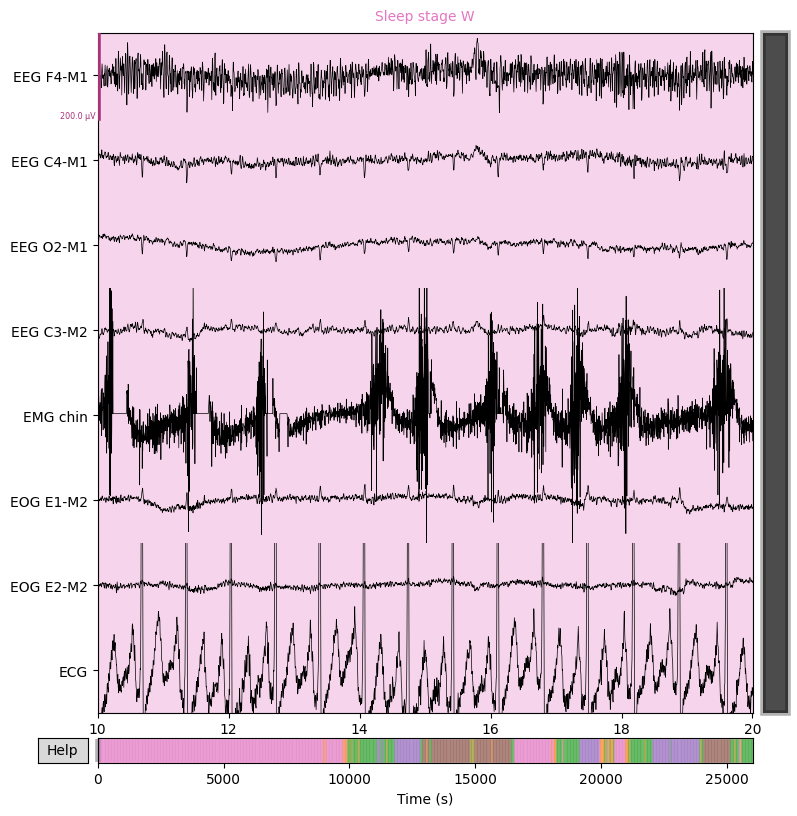

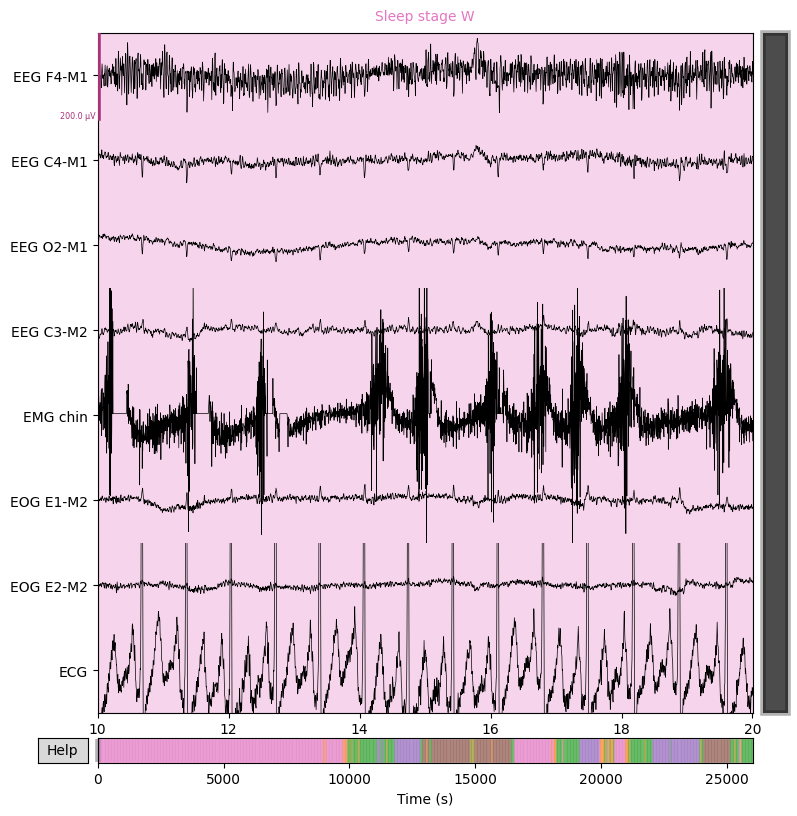

In [18]:
raw_train[1].plot(start=10, duration=10,
               scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7,
                            misc=1e-1))


**Preprocessing of data: Filtering and ICA**

In [ ]:
filt_raw=[]
for i in raw_train:
  filt_raw.append(i.copy().filter(l_freq=1., h_freq=None))

In [ ]:
annotation_desc_2_event_id = {'Sleep stage W': 1,
                              'Sleep stage N1': 2,
                              'Sleep stage N2': 2,
                              'Sleep stage N3': 2,
                              'Sleep stage R': 3}

# keep last 30-min wake events before sleep and first 30-min wake events after
# sleep and redefine annotations on raw data
for i,_ in enumerate(filt_raw):
   annot_train[i].crop(annot_train[i][1]['onset'] - 30 * 60,
                 annot_train[i][-2]['onset'] + 30 * 60)
   filt_raw[i].set_annotations(annot_train[i], emit_warning=False)

events_trains=[]
count=0

for i in filt_raw:
  print(count)
  events_train, _ = mne.events_from_annotations(
    i, event_id=annotation_desc_2_event_id, chunk_duration=30.)
  events_trains.append(events_train)
  count=count+1

# create a new event_id that unifies stages 3 and 4
event_id = {'Sleep stage W': 1,
            'Sleep stage N1/N2/N3': 2,
            'Sleep stage R': 3}
            # 'Sleep stage N3': 4,
            # 'Sleep stage R': 5}

#plot events
fig = mne.viz.plot_events(events_trains[1], event_id=event_id,
                          sfreq=filt_raw[1].info['sfreq'],
                          first_samp=events_trains[1][0, 0],on_missing='warn')

# keep the color-code for further plotting
stage_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']